No duplicates
Dataset rows and columns set


Top five highest price increases since 1995: 
0                  1-1-1995     1-2-1995     1-3-1995     1-4-1995  \
Borough                                                              
Hackney         61296.52637  63187.08332  63593.29935  65139.64403   
Waltham Forest  61319.44913  60252.12246  60871.08493  60971.39722   
Islington       92516.48557  94342.37334  93465.86407  93344.49305   
Tower Hamlets   59865.18995  62318.53353  63938.67686  66233.19383   
Southwark       67885.20344   64799.0648  65763.29719  63073.62117   

0                  1-5-1995     1-6-1995     1-7-1995     1-8-1995  \
Borough                                                              
Hackney         66193.99212  66921.17101    68390.753  68096.79385   
Waltham Forest  61494.16938  61547.79643  61933.52738   61916.4222   
Islington       94346.39917  97428.94311  98976.14077  98951.20791   
Tower Hamlets   66432.85846  66232.16372  64692.22672  63472.27558  

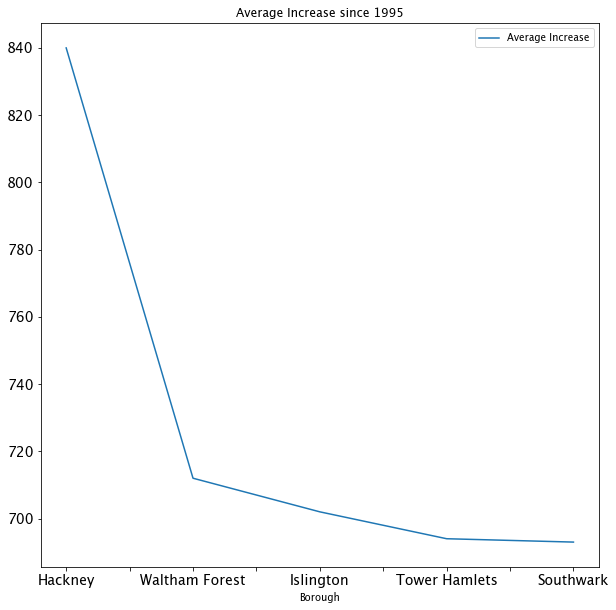

In [1]:
"""
Dear Springboard Grader, 
    I took the video on self-reliance to heart and did 
nothing more than download tier 3, write the question down, 
and deleted most of the comments and instructions and went about
it as though I were asked by my boss to get this information. 
It took a long time. maybe 13 hours. I know taht sounds crazy 
but I figured every litlle thing out and spent too much time 
on experimenting with python code. It was certainly a 
learnign experience. I choose not to answer the last modeling
function because I just have to get going to the next module. 
I used the functions in my current code as proof that function 
would have been executed properly. I left brief comments along
the way in order to show how may have been thinking in a real 
world task. ie: obviosuly the boroughs were accurate,
but that may not have been obvious in the office environment. 
I was also begining to go down the rabbit hole with the graph 
when I couldn't figure out in a speedy way to adjust the
borough names. Sorry. 
I look forward to your feedback. 
Cheers. 
Scott
    
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timezone

"""

Which London borough has seen the greatest avgerage 
increase in housing prices over the dataset?

The ‘annual’ percentage change in house prices is simply the
price change relative to the same month twelve months earlier.

This annual rate of price change reflects the best estimate for 
how much the value of a typical property has changed over the 
precedingtwelve months. Similar to the ‘annual’ change, 
the ‘monthly’ percentage change estimates the percentage 
change in average house prices relative to the previous month.
  
"""
def change_date(timestamp_list):
	dict_key = []
	dict_value = []
	for name in timestamp_list:
		t = name
		u = t.date()
		v = f'{u.day}-{u.month}-{u.year}'
		dict_key.append(t)
		dict_value.append(v)
	return dict(zip(dict_key,dict_value))


def avg_increase(last: float,first: float) -> float:
	return round(((last - first) / first) * 100)


url_LondonHousePrices = "https://data.london.gov.uk/download/uk-" \
                        "house-price-index/70ac0766-8902-4eb5-aab5-" \
                        "01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices,
                           sheet_name="Average price",index_col=None)

# list of actual boroughs: real world details
actual_boroughs = sorted(['Westminster',
                          'Kensington & Chelsea',
                          'Hammersmith & Fulham',
                          'Wandsworth',
                          'Lambeth',
                          'Southwark',
                          'Tower Hamlets',
                          'Hackney',
                          'Islington',
                          'Camden',
                          'Brent',
                          'Ealing',
                          'Hounslow',
                          'Richmond upon Thames',
                          'Kingston upon Thames',
                          'Merton',
                          'Sutton',
                          'Croydon',
                          'Bromley',
                          'Lewisham',
                          'Greenwich',
                          'Bexley',
                          'Havering',
                          'Barking and Dagenham',
                          'Redbridge',
                          'Newham',
                          'Waltham Forest',
                          'Haringey',
                          'Enfield',
                          'Barnet',
                          'Harrow',
                          'Hillingdon'])

# data set boroughs for later comparison
data_set_boroughs = list(properties.columns)

# see what's going on
hd = properties.head()
shp = properties.shape  # 329, 49
d_type = properties.dtypes

# deal with unneeded columns
for (name,series) in properties.iteritems():
	if series.isna().all():
		properties.drop(name,axis=1,inplace=True)

name = properties.rename(columns={'Unnamed: 0': 'Date'},inplace=True)
test_date = properties.loc[:1,'Date']

# deal with unneeded rows
dups = properties.duplicated()
if dups.any():
	for j,k in enumerate(dups):
		if k:
			print(f'delete {j}\nIs duplicate')
			properties.drop_duplicates(j,axis=1,inplace=True)
else:
	print('No duplicates')

properties.drop(index=0,axis=0,inplace=True)
properties.drop(columns='City of London',axis=1,inplace=True)

# verify real world vs data set
actual_boroughs.append("Date")
length_west = properties.loc[:,:'Westminster']
list_west = [i.strip() for i in sorted(list(properties.loc[:,:'Westminster']))]
actual_boroughs_1 = [i.strip() for i in sorted(actual_boroughs)]

for i in list_west:
	for j in actual_boroughs_1:
		if i == j:
			continue
print(f'Dataset rows and columns set\n\n')

############################################################################

# make things easier on the eyes
length_west_tr = length_west.transpose()
length_west_tr.reset_index(inplace=True)
header_row = length_west_tr.iloc[0]

t_spose = pd.DataFrame(length_west_tr.values[1:],columns=header_row)
t_spose.rename(columns={"Date": "Borough"},inplace=True)
t_spose.set_index('Borough',inplace=True)
date_list = list(t_spose.columns)
t_spose.rename(columns=change_date(date_list),inplace=True)

# calculate average increase and present findings
average_increase = [
    avg_increase(rows[-1], rows[0]) for index, rows in t_spose.iterrows()]

t_spose['Average Increase'] = average_increase
t_spose.sort_values(by='Average Increase', ascending=False, inplace=True)

print(f'Top five highest price increases since 1995: \n{t_spose.head(5)}')
print(f'Bottom five lowest price increases since 1995: \n{t_spose.tail(5)}')

t_spose_5 = t_spose.head(5).reset_index()
y_val = t_spose_5.loc[:,'Average Increase']
ax = plt.gca()
t_spose_5.plot(x='Borough',y='Average Increase',kind='line',
               title='Average Increase since 1995',fontsize=14,
               figsize=(10,10),ax=ax)
plt.show()


Summary:
[Scott Hensley_London Answers]
cohort_2022-july
Email: jshensley@pm.me
London Borough Housing Prices

Hackney has seen the largest increase in prices at 890%.
Since 1995, London boroughs have all seen an increase in average housing prices. The highest increase is in Hackney where prices have soared by 890%. On the other end, Sutton has only increased by 490%, which is still significant. This indicates London as a whole has become a more desirable place to live.
This information was downloaded from https://data.london.gov.uk/ and processed via standard pandas methods.